In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import imageio 
import pathlib 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

In [2]:
# Read File / Folder Path
data_path=pathlib.Path('D:/Project AI/cell_images')

In [3]:
# Read Classes in folder return list of images
parasitized=list(data_path.glob('Parasitized/*'))[:1000]
uninfected=list(data_path.glob('Uninfected/*'))[:1000]

In [4]:
data={
    'parasitized' : parasitized,
    'uninfected' : uninfected 
}

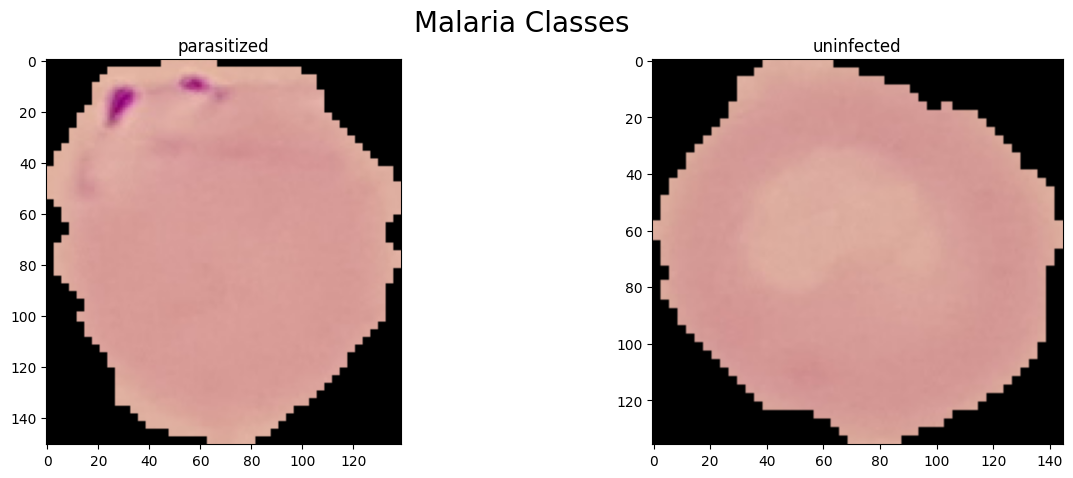

In [5]:
fig,ax=plt.subplots(ncols=2,figsize=(15,5))
fig.suptitle("Malaria Classes",fontsize=20)

img_parasitized=img.imread(parasitized[2])
img_uninfected=img.imread(uninfected[1])

for index , name in enumerate(list(data.keys())):
    ax[index].set_title(name)

ax[0].imshow(img_parasitized)
ax[1].imshow(img_uninfected)
plt.show()

In [6]:
data_generator=ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [7]:
train_data=data_generator.flow_from_directory('D:/Project AI/cell_images',
                                              batch_size=32,
                                              subset='training',
                                              shuffle=True,
                                              class_mode='binary',
                                              target_size=(224,224))

Found 22048 images belonging to 2 classes.


In [8]:
test_data=data_generator.flow_from_directory('D:/Project AI/cell_images',
                                             class_mode='binary',
                                             shuffle=True,
                                             subset='validation',
                                             target_size=(224,224),
                                             batch_size=1)

Found 5510 images belonging to 2 classes.


In [24]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
es=EarlyStopping(patience=2)

In [27]:
model_hist=model.fit(train_data,validation_data=test_data,epochs=4,callbacks=[es])

Epoch 1/4
689/689 ━━━━━━━━━━━━━━━━━━━━ 495s 713ms/step - accuracy: 0.6682 - loss: 2.7394 - val_accuracy: 0.9085 - val_loss: 0.4313
Epoch 2/4
689/689 ━━━━━━━━━━━━━━━━━━━━ 585s 849ms/step - accuracy: 0.9253 - loss: 0.2398 - val_accuracy: 0.9318 - val_loss: 0.2393
Epoch 3/4
689/689 ━━━━━━━━━━━━━━━━━━━━ 679s 983ms/step - accuracy: 0.9459 - loss: 0.1575 - val_accuracy: 0.9247 - val_loss: 0.2586
Epoch 4/4
689/689 ━━━━━━━━━━━━━━━━━━━━ 686s 993ms/step - accuracy: 0.9597 - loss: 0.1214 - val_accuracy: 0.9307 - val_loss: 0.2329


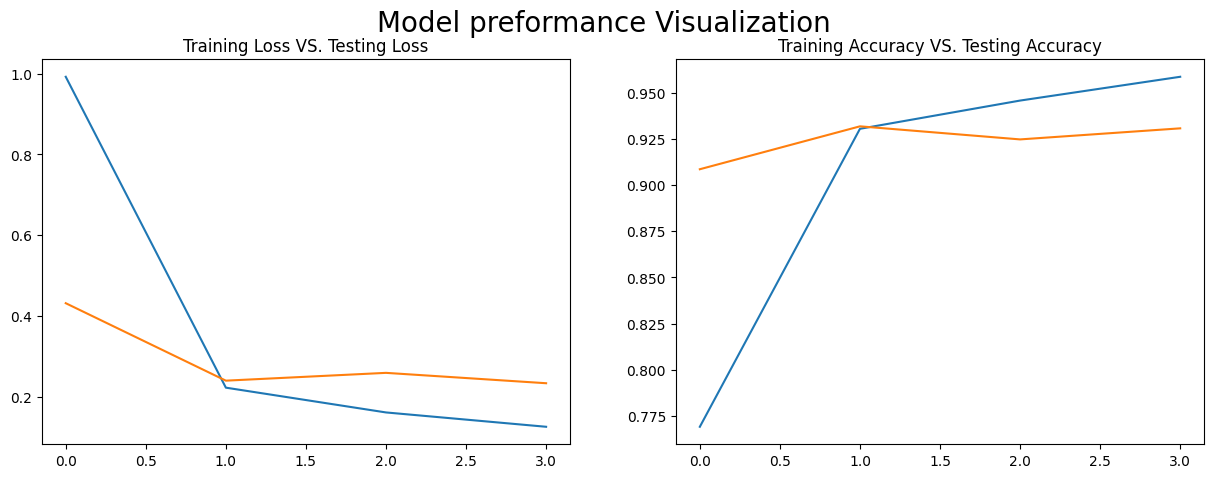

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Model preformance Visualization",fontsize=20)
ax[0].plot(model_hist.history['loss'],label='Training Loss')
ax[0].plot(model_hist.history['val_loss'],label='Testing Loss')
ax[0].set_title("Training Loss VS. Testing Loss")

ax[1].plot(model_hist.history['accuracy'],label='Training Accuracy')
ax[1].plot(model_hist.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title("Training Accuracy VS. Testing Accuracy")
plt.show()

In [30]:
loos,acc=model.evaluate(train_data)
print(f'Accuracy of training is {acc*100}')

689/689 ━━━━━━━━━━━━━━━━━━━━ 90s 131ms/step - accuracy: 0.9771 - loss: 0.0848
Accuracy of training is 97.94085621833801


In [31]:
loos,acc=model.evaluate(test_data)
print(f'Accuracy of training is {acc*100}')

5510/5510 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step - accuracy: 0.9350 - loss: 0.2263
Accuracy of training is 93.06715130805969


In [33]:
classes_map=dict([value,key] for key,value in train_data.class_indices.items())
classes_map

{0: 'Parasitized', 1: 'Uninfected'}

In [54]:
test_img_Parasitized='D:/Project AI/cell_images/Parasitized/C33P1thinF_IMG_20150619_121229a_cell_177.png'

test_img_Uninfected='D:/Project AI/cell_images/Uninfected/C3thin_original_IMG_20150608_162835_cell_174.png'

In [40]:
def predicate_image(testing_img,Actual_label):
    img_test=image.load_img(testing_img,target_size=(224,224))
    img_arr=image.img_to_array(img_test)/255
    input_image=img_arr.reshape((1,img_arr.shape[0],
                                 img_arr.shape[1],
                                 img_arr.shape[2]))
    
    predict_label=np.argmax(model.predict(input_image))
    predict_class=classes_map[predict_label]
    
    plt.figure(figsize=(10,8))
    plt.imshow(img_arr)
    plt.title(f"Actual Label is: {Actual_label} | Predict Label is: {predict_class}",fontsize=15)
    plt.grid()
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


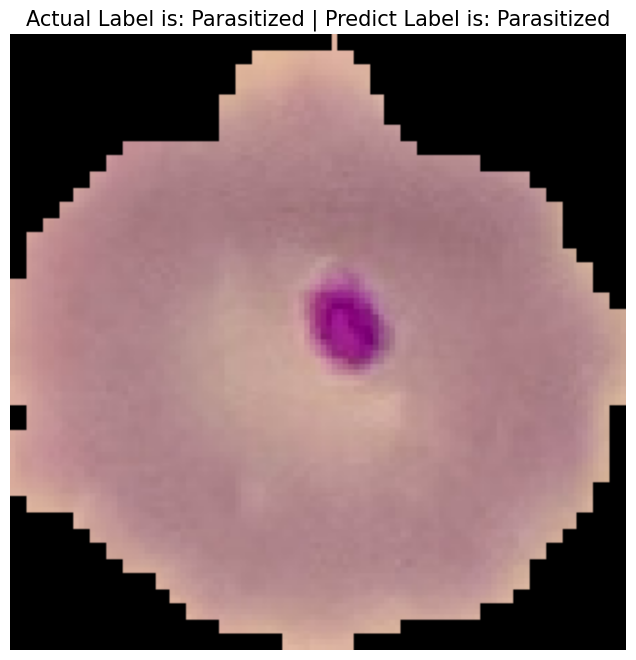

In [49]:

predicate_image(test_img_Parasitized,'Parasitized')